In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Normalize rows of a non-negative matrix
def normRows(M):
    for row in M:
        row /= np.sum(row)
    return M

# Update excitatory and inhibitory populations of a neuronal rate model
def update(xExc, xInh, alpha, noise):
    excInpEff = M_EE.dot(xExc)- M_IE.dot(xInh) + np.random.uniform(0, noise, xExc.shape)
    inhInpEff = M_EI.dot(xExc) - M_II.dot(xInh) + np.random.uniform(0, noise, xInh.shape)
    xExcNew = (1 - alpha) * xExc + alpha * excInpEff
    # + alpha * inhInpEff
    xInhNew = (1 - alpha) * xInh + alpha * inhInpEff 
    #+ alpha * excInpEff
    return xExcNew, xInhNew


In [3]:

########################
#  Initialization
########################

nExc = 400   # Number of excitatory neurons
nInh = 100   # Number of inhibitory neurons
alpha = 0.1  # Neuronal leak rate (alpha = dt / tau)
noise = 0.1  # Input noise magnitude

# Neuronal population firing rates
xExc = np.random.uniform(0, 1, nExc)
xInh = np.random.uniform(0, 1, nInh)

# Synaptic weights
M_EE = normRows(np.random.uniform(0, 1, (nExc, nExc)))
M_IE = normRows(np.random.uniform(0, 1, (nExc, nInh)))
M_EI = normRows(np.random.uniform(0, 1, (nInh, nExc)))
M_II = normRows(np.random.uniform(0, 1, (nInh, nInh)))


In [4]:

########################
#  Run Simulation
########################

tSteps = 10

# We will track the average magnitudes of excitatory and inhibitory populations
excMag = np.zeros(tSteps)
inhMag = np.zeros(tSteps)
excMag[0] = np.linalg.norm(xExc)
inhMag[0] = np.linalg.norm(xInh)

for t in range(1, tSteps):
    xExc, xInh = update(xExc, xInh, alpha, noise)
    
    excMag[t] = np.linalg.norm(xExc)
    inhMag[t] = np.linalg.norm(xInh)
    

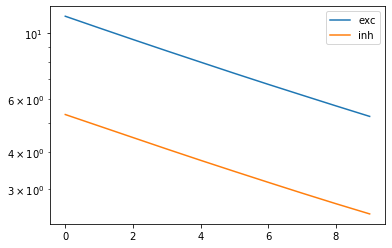

In [5]:

########################
#  Plotting
########################
plt.figure()
plt.semilogy(excMag, label='exc')
plt.semilogy(inhMag, label='inh')
plt.legend()
plt.show()


In [6]:
from brian2 import*

ModuleNotFoundError: No module named 'brian2'